In [7]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

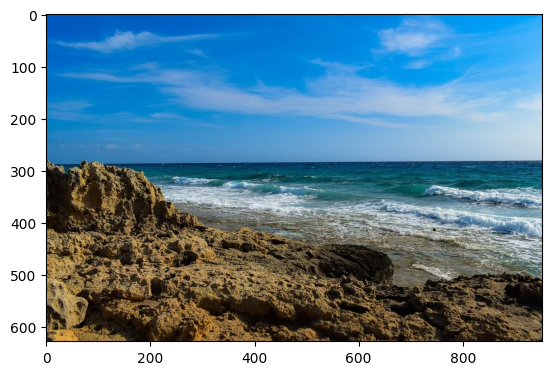

In [8]:
img_color = cv.imread('segmentacion.png')

if img_color is None:
    print("La imagen no se cargó correctamente")
else:
    imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

    plt.figure(1)
    plt.imshow(imgRGB)
    plt.show()

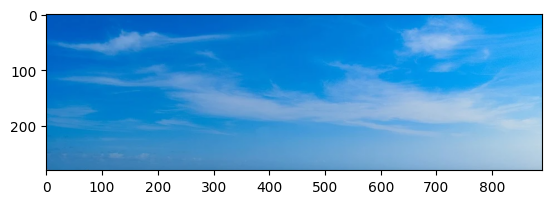

In [27]:
img_muestra_cielo = imgRGB[0:280, 0:890,:]
plt.figure(2)
plt.imshow(img_muestra_cielo)
plt.show()

In [28]:
color_mean_cielo, color_std_cielo = cv.meanStdDev(img_muestra_cielo)
print(color_mean_cielo.flatten().tolist())
print(color_std_cielo.flatten().tolist())

[58.288378812199035, 148.0070144462279, 214.01364365971108]
[55.54457661872825, 27.584998055677584, 15.639295336870251]


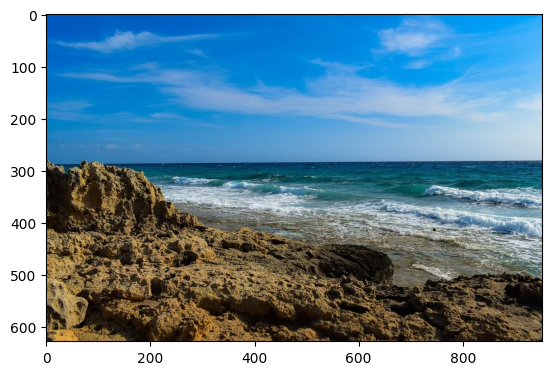

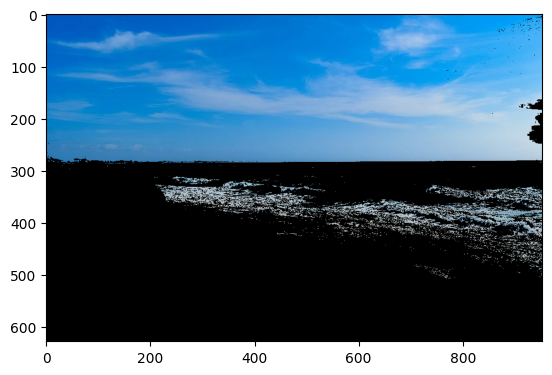

<function matplotlib.pyplot.show(close=None, block=None)>

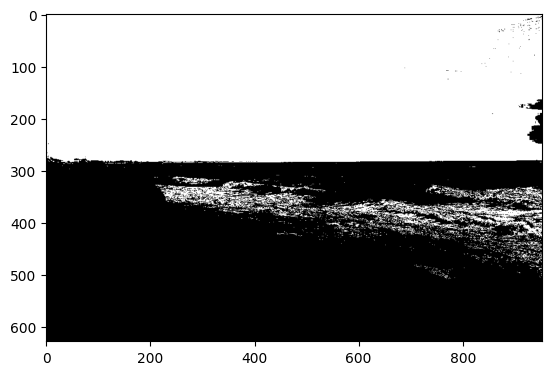

In [33]:
n_sigma = 2.5
mask_cielo = cv.inRange(imgRGB, color_mean_cielo-color_std_cielo * n_sigma,  color_mean_cielo+color_std_cielo * n_sigma)
img_segmentada_cielo = cv.bitwise_and(imgRGB, imgRGB, mask=mask_cielo)


plt.figure(99)
plt.imshow(imgRGB)
plt.show()

plt.figure(5)
plt.imshow(img_segmentada_cielo)
plt.show()

plt.figure(6)
plt.imshow(mask_cielo,cmap='gray')
plt.show

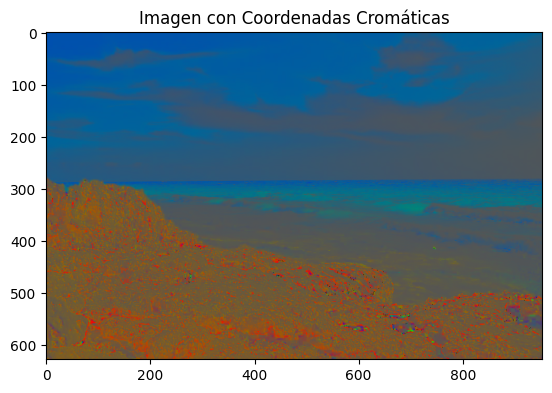

In [36]:
# Convertir la imagen a float32 para evitar desbordamiento
imgRGB_float = imgRGB.astype(np.float32)

# Calcular la suma de los canales de color
color_sum = np.sum(imgRGB_float, axis=2, keepdims=True)

# Evitar la división por cero añadiendo un pequeño valor a color_sum
color_sum = np.where(color_sum==0, 1, color_sum)

# Calcular las coordenadas cromáticas
img_chrom = imgRGB_float / color_sum

# Mostrar la imagen con las coordenadas cromáticas
plt.figure()
plt.imshow(img_chrom)
plt.title('Imagen con Coordenadas Cromáticas')
plt.show()

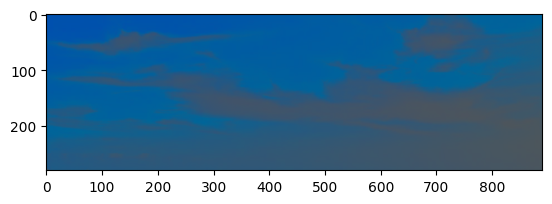

In [39]:
img_muestra_cielo_chrom = img_chrom[0:280, 0:890,:]
plt.figure(2)
plt.imshow(img_muestra_cielo_chrom)
plt.show()


[0.11902353568631187, 0.3540845397186509, 0.5268919256077197]
[0.10123977241833791, 0.01835823680203327, 0.08951034434145605]


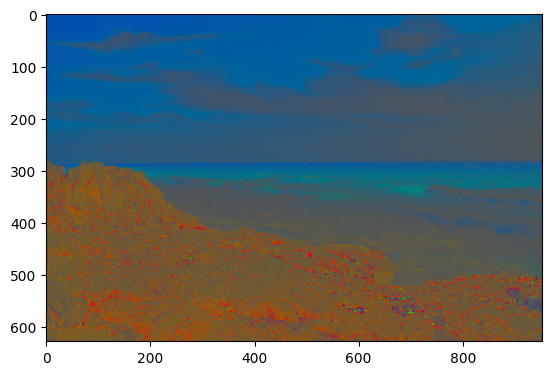

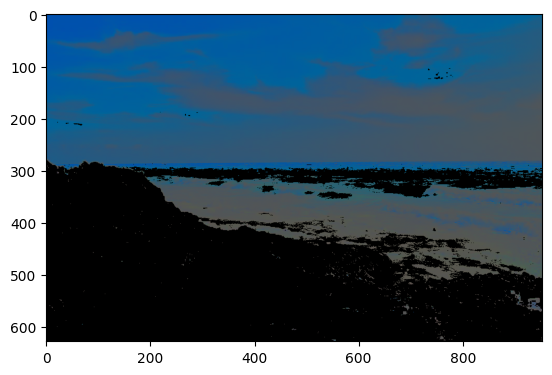

<function matplotlib.pyplot.show(close=None, block=None)>

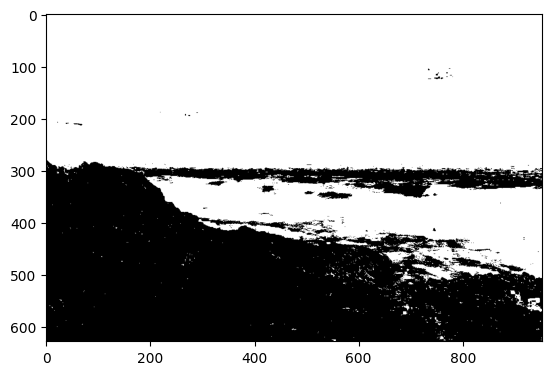

In [42]:
color_mean_cielo_chrom, color_std_cielo_chrom = cv.meanStdDev(img_muestra_cielo_chrom)
print(color_mean_cielo_chrom.flatten().tolist())
print(color_std_cielo_chrom.flatten().tolist())

n_sigma = 2.5
mask_cielo_chrom = cv.inRange(img_chrom, color_mean_cielo_chrom-color_std_cielo_chrom * n_sigma,  color_mean_cielo_chrom+color_std_cielo_chrom * n_sigma)
img_segmentada_cielo_chrom = cv.bitwise_and(img_chrom, img_chrom, mask=mask_cielo_chrom)

plt.figure(99)
plt.imshow(img_chrom)
plt.show()

plt.figure(5)
plt.imshow(img_segmentada_cielo_chrom)
plt.show()

plt.figure(6)
plt.imshow(mask_cielo_chrom,cmap='gray')
plt.show

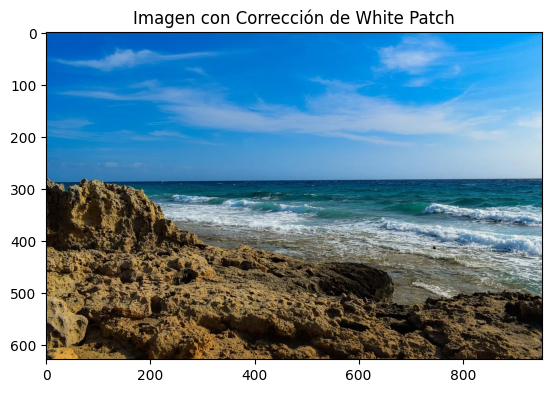

In [35]:
# Calcular el color más blanco en la imagen
white_patch = np.max(imgRGB_float, axis=(0, 1))

# Evitar la división por cero añadiendo un pequeño valor a white_patch
white_patch = np.where(white_patch==0, 1, white_patch)

# Aplicar la corrección de white patch
img_white_patch = imgRGB_float / white_patch

# Mostrar la imagen con la corrección de white patch
plt.figure()
plt.imshow(img_white_patch)
plt.title('Imagen con Corrección de White Patch')
plt.show()

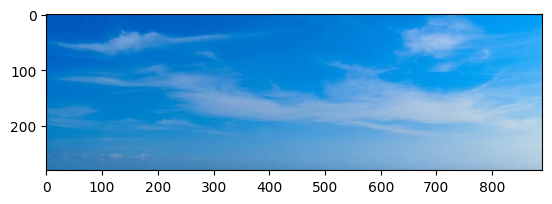

In [41]:
img_muestra_cielo_white_patch = img_white_patch[0:280, 0:890,:]
plt.figure(2)
plt.imshow(img_muestra_cielo_white_patch)
plt.show()

[0.22858188431935547, 0.5804196821233291, 0.8392692004026991]
[0.2178218757547189, 0.10817646550290914, 0.06133056628928642]


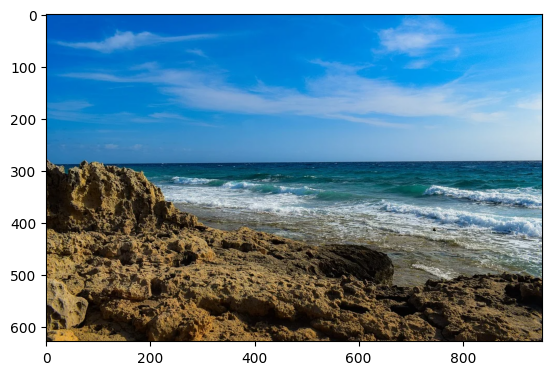

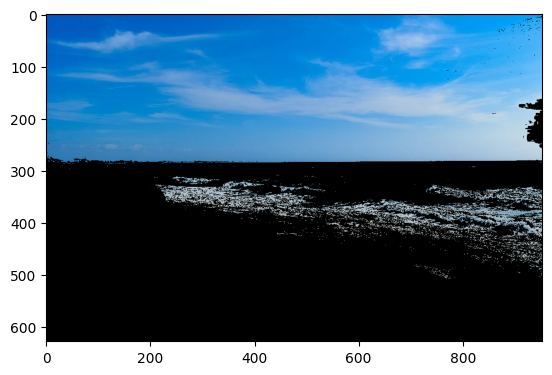

<function matplotlib.pyplot.show(close=None, block=None)>

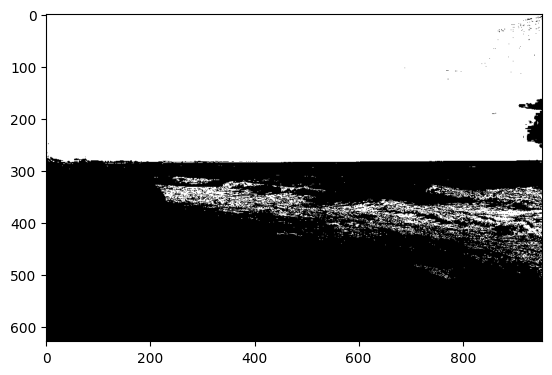

In [43]:
color_mean_cielo_white_patch, color_std_cielo_white_patch = cv.meanStdDev(img_muestra_cielo_white_patch)
print(color_mean_cielo_white_patch.flatten().tolist())
print(color_std_cielo_white_patch.flatten().tolist())

n_sigma = 2.5
mask_cielo_white_patch = cv.inRange(img_white_patch, color_mean_cielo_white_patch-color_std_cielo_white_patch * n_sigma,  color_mean_cielo_white_patch+color_std_cielo_white_patch * n_sigma)
img_segmentada_cielo_white_patch = cv.bitwise_and(img_white_patch, img_white_patch, mask=mask_cielo_white_patch)


plt.figure(99)
plt.imshow(img_white_patch)
plt.show()

plt.figure(5)
plt.imshow(img_segmentada_cielo_white_patch)
plt.show()

plt.figure(6)
plt.imshow(mask_cielo_white_patch,cmap='gray')
plt.show